# 7. Plots
## 7.2 TOI 263.01 in context

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from matplotlib.colors import LogNorm, SymLogNorm, PowerNorm, BoundaryNorm, DivergingNorm

In [3]:
%run src/core.py
%run src/plotting.py

In [97]:
df = derive_qois(read_mcmc('results/toi_263_tess_m2_lco.nc'))
ctl = pd.read_csv('exoplanet.eu_catalog.csv').dropna(subset=['radius', 'orbital_period'])

In [100]:
df_bds = pd.concat([ctl[ctl.iloc[:,0] == 'AD 3116 b'], ctl[ctl.iloc[:,0] == 'NLTT 41135 b']])
df_bds

,# name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
33,AD 3116 b,Confirmed,54.2,4.3,4.3,NaN,NaN,NaN,1.02,0.28,...,M3.9,NaN,NaN,NaN,3200.0,200.0,200.0,NaN,NaN,"2MASS J08423943+1924520, EPIC 211946007"
3478,NLTT 41135 b,Confirmed,33.7,2.8,2.8,33.7,2.8,2.8,1.13,0.17,...,M5.1,NaN,NaN,NaN,3230.0,130.0,130.0,NaN,NaN,NaN


In [103]:
ctl.drop(df_bds.index.values, inplace=True)

## Brown dwarf periods and radii

Brown dwarf periods and radii taken from Carmichael et al. (C19, Astron. J. 158, 2019), Persson et al. (P19, A&A 628, 2019), Jackman et al. (J19, ArXiv:1906.08219), and David et al. (D19, ApJ 872, 2019).

In [5]:
bdh_periods = array([12.713,  1.218,   1.888, 3.192,  4.157, 2.209, 4.257, 3.060, 5.819, 21.087, # C19
                     30.360, 11.720, 166.788, 5.894, 40.737, 5.170, 5.293, 9.779, 9.779,         # C19
                     5.27])                                                                      # P19

bdh_radii = array([0.833, 1.116, 1.384, 1.217, 0.889, 0.937, 1.01, 1.12, 1.10, 1.24, 0.998,      # C19
                   0.807, 0.79, 1.089, 0.757, 0.874, 0.941, 6.5, 5.0,                            # C19
                   0.83])                                                                        # P19

In [134]:
bdc_names = ['NGTS-7Ab', 'LP 261-75b', 'NLTT 41135 b', 'AD 3116 b', 'RIK 72 b']
bdc_periods = [16.2 / 24,               # J19
               1.882, 2.889, 1.983,     # C19
               97.76]                   # D19
bdc_radii = [1.38,                      # J19
             0.898, 1.13, 1.02,         # C19
             3.10]                      # D19

sid = argsort(bdc_periods)
bdc_names = array(bdc_names)[sid]
bdc_periods = array(bdc_periods)[sid]
bdc_radii = array(bdc_radii)[sid]

In [135]:
sp_clump = ctl[mcool & (ctl['radius'] > 0.75) & (ctl['orbital_period'] < 10)]['# name, orbital_period, radius'.split(', ')]
sp_clump.columns = 'name period radius'.split()
sp_clump = sp_clump.reset_index().drop('index', 1)
sp_clump.drop(0, inplace=True)
sp_clump.sort_values('period', inplace=True)
sp_clump = sp_clump.reset_index().drop('index', 1)

In [136]:
for c,d in sp_clump.iterrows():
    print(c+1, d.iloc[0], d.period)
    
print(bdc_names[1:])

1 Kepler-45 b 2.4552389999999997
2 NGTS-1 b 2.647298
3 HATS-6 b 3.3252725
4 HATS-71A b 3.7955212999999994
5 GJ 674 b 4.6944
['LP 261-75b' 'AD 3116 b' 'NLTT 41135 b' 'RIK 72 b']


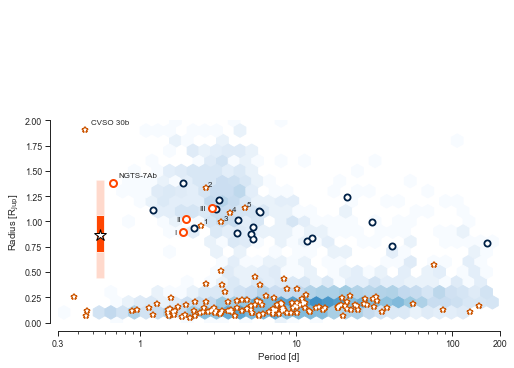

In [146]:
pes = percentile(df.r_true, [50, 16, 84, 0.5, 99.5])
mcool = ctl.star_teff <= 4000

sb.set_style('ticks')
with sb.plotting_context('paper'): #, rc=rc_paper):
    fig, ax = subplots(figsize=(AAPGW, AAOCW))#, constrained_layout=True)
    
    # Planets orbiting "hot" hosts stars
    # ----------------------------------
    hexbin(ctl.orbital_period[~mcool], ctl.radius[~mcool], gridsize=(37,10), xscale='log', 
           extent=(log10(0.3), log10(180), 0, 2), mincnt=1, cmap=cm.Blues, norm=PowerNorm(0.5, 1, 200))
    
    # Planets orbiting cool hosts stars
    # ---------------------------------
    ax.semilogx(ctl.orbital_period[mcool], ctl.radius[mcool], 'w*', markeredgewidth=2, markeredgecolor=c_bo, ms=6)
    ax.semilogx(ctl.orbital_period[mcool], ctl.radius[mcool], 'w*', markeredgewidth=0, ms=5)
    
    # Brown dwarfs orbiting "hot" host stars
    # --------------------------------------
    ax.semilogx(bdh_periods, bdh_radii, 'wo', markeredgecolor=c_ob, ms=6, markeredgewidth=2)
    ax.semilogx(bdh_periods, bdh_radii, 'wo', markeredgecolor='w', ms=4, markeredgewidth=0)
        
    # Brown dwarfs orbiting cool host stars
    # -------------------------------------
    ax.semilogx(bdc_periods, bdc_radii, 'wo', ms=7, markeredgecolor='orangered', markeredgewidth=2)

    # NGTS-7Ab
    ax.annotate('NGTS-7Ab', (bdc_periods[0], bdc_radii[0]), (5.5, 5.5), textcoords='offset points', size='small')
    
    # CVSO 30 b
    ax.annotate('CVSO 30b', (0.45, 1.91), (5.5, 5.5), textcoords='offset points', size='small')
    
    for i,d in sp_clump.iterrows():
        ax.annotate(i+1, (d.period, d.radius), (2., 2.), textcoords='offset points', size='small')
    
    for i,p,k in zip('I II III IV'.split(), bdc_periods[1:], bdc_radii[1:]):
        ax.annotate(i, (p, k), (-6, 0), textcoords='offset points', size='small', ha='right', va='center', zorder=100)

    # TOI 263
    # -------
    ax.plot(df.p.mean(), pes[0], 'w*', ms=12, markeredgecolor='k', markeredgewidth=1)
    ax.bar(df.p.mean(), pes[4]-pes[3], 0.06, pes[3], alpha=0.2, fc='orangered')
    ax.bar(df.p.mean(), pes[2]-pes[1], 0.06, pes[1], alpha=1.0, fc='orangered')

    setp(ax, ylim=(0,2), xlim=(0.3, 200), ylabel='Radius [R$_\mathrm{Jup}$]', xlabel='Period [d]',
        xticks=(0.3, 1, 10, 100, 200), xticklabels=(0.3, 1, 10, 100, 200))
    sb.despine(fig, offset=8)
    fig.tight_layout()
    fig.subplots_adjust(left=0.1, top=0.97, bottom=0.16)
    fig.savefig('plots/toi_263_in_context.pdf')

---


<center> © 2019 Hannu Parviainen </center>